# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Import your libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [10]:
# Read the file
# df = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows = 500000)
df = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows = 50000)

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Describe the file
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.0
mean,7.453800,1.562645e+05,7.333083e+05,7.472741e+05,8.444671e+05,1.164400e+06,0.002000,0.0
std,2.056636,3.243949e+05,2.202405e+06,2.239971e+06,2.433388e+06,2.915203e+06,0.044677,0.0
min,1.000000,6.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.734572e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,3.341482e+04,1.703072e+04,0.000000e+00,2.126000e+03,0.000000e+00,0.000000,0.0
75%,9.000000,1.878390e+05,1.331716e+05,1.438734e+05,4.632050e+05,8.649264e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,3.014320e+07,3.197699e+07,1.000000,0.0


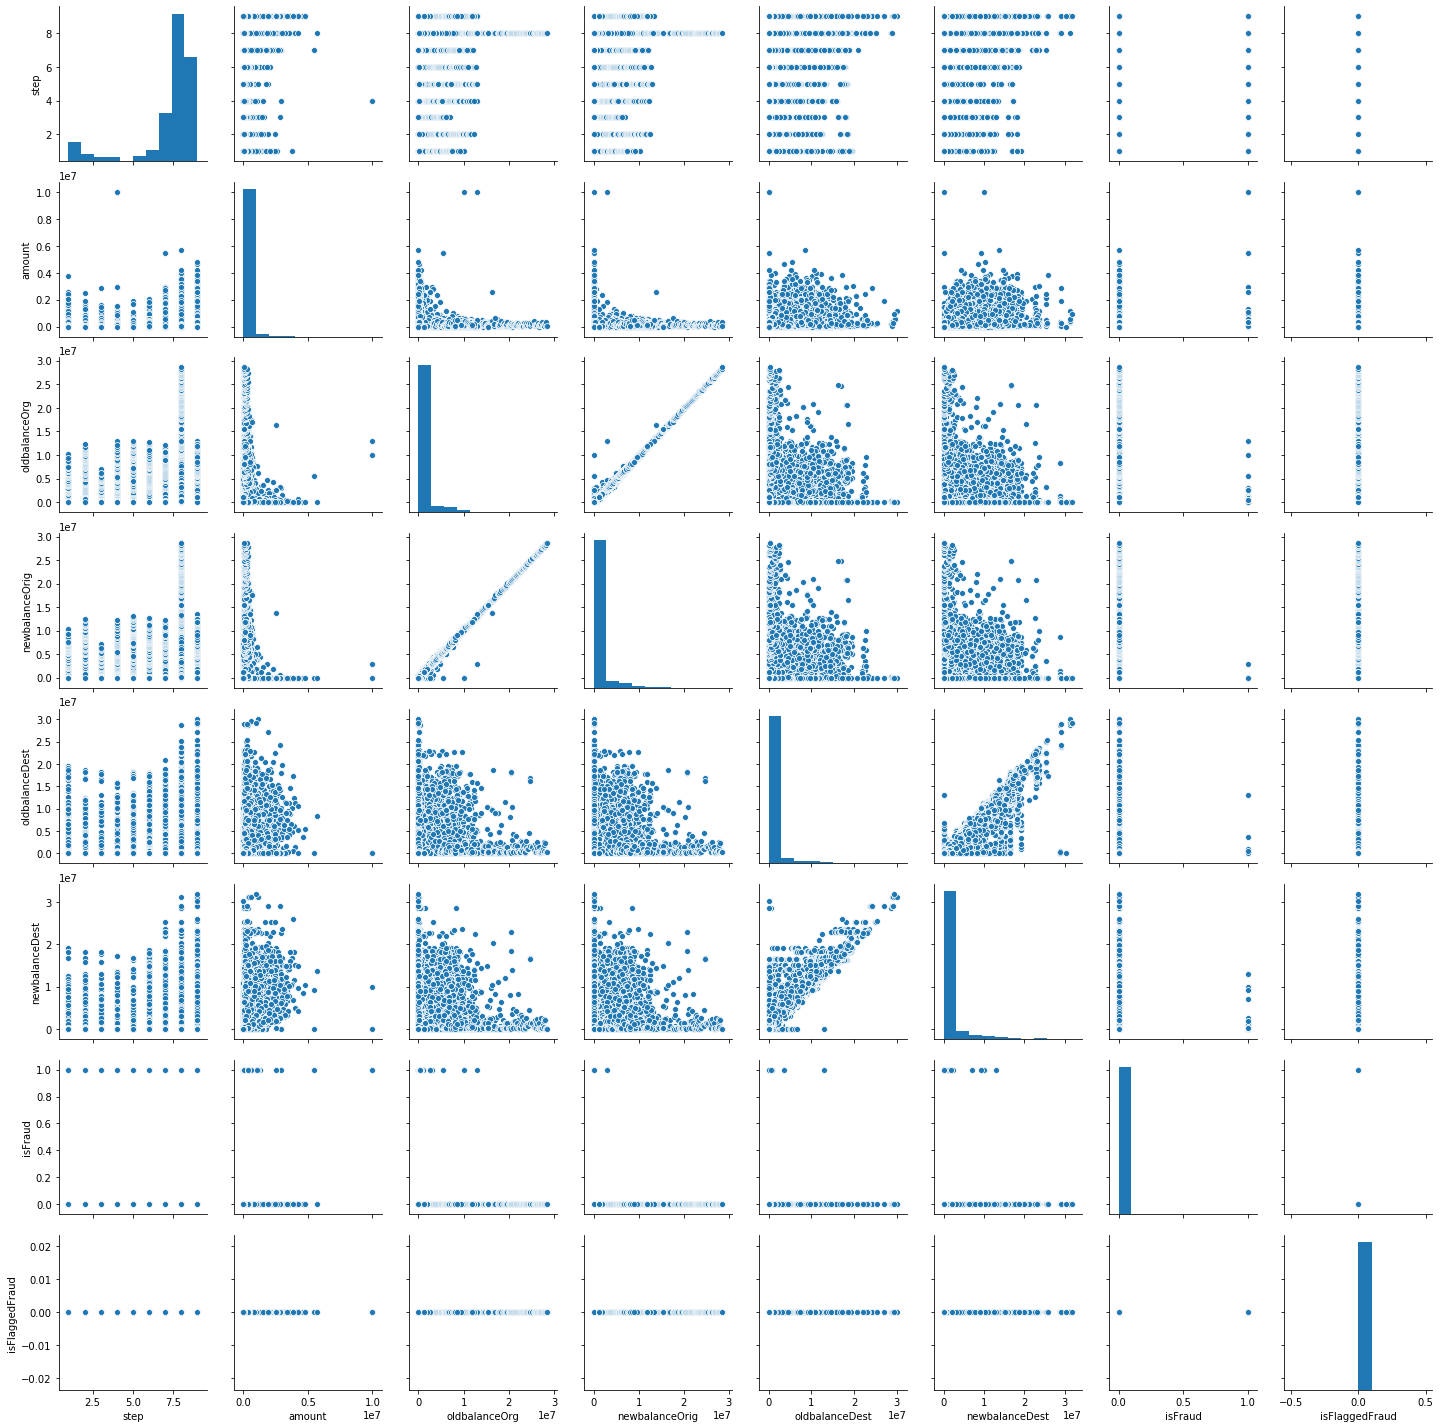

In [13]:
sns.pairplot(df)

### What is the distribution of the outcome? 

In [16]:
# Check how many frauds are detected
df["isFraud"].value_counts()

0    49900
1      100
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [1]:
# Your code here


### Run a logisitc regression classifier and evaluate its accuracy.

In [ ]:
# Your code here

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Your code here

### Which model worked better and how do you know?

In [2]:
# Your response here